In [ ]:
import pandas as pd


In [ ]:
# Loading the dataset from CSV file
data=pd.read_csv("IMDB Dataset.csv")


In [ ]:
# Loading the dataset from CSV file
import pandas as pd
data=pd.read_csv("IMDB Dataset.csv")

# Displaying the first few rows of the dataset
print(data.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


In [ ]:
# Downloading the VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Initializing VADER sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
# [nltk_data] Downloading package vader_lexicon to /root/nltk_data...
# [nltk_data]   Package vader_lexicon is already up-to-date!

In [ ]:
# Defining a function to get sentiment
def get_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'


In [ ]:
# Applying sentiment analysis to the first 100 observations
data['predicted_sentiment'] = data['review'].head(100).apply(get_sentiment)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
true_sentiments = data['sentiment'].head(100)
predicted_sentiments = data['predicted_sentiment'].head(100)



In [ ]:
# Generating confusion matrix
cm = confusion_matrix(true_sentiments, predicted_sentiments, labels=['positive', 'negative'])


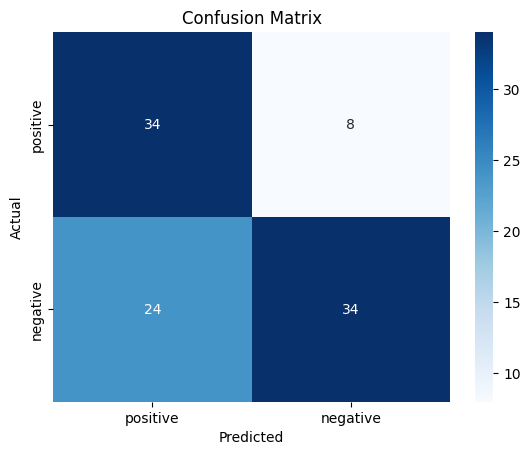

In [ ]:
# Plotting confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
[42]
# Calculating sentiment scores for each review and convert it to a DataFrame
sentiment_scores = data['review'].apply(sia.polarity_scores).apply(pd.Series)


In [ ]:
# Merging the sentiment scores DataFrame with the original data
data = pd.concat([data, sentiment_scores], axis=1)



In [ ]:
# Displaying the first 100 rows with sentiment scores
data.head(100)

,review,sentiment,predicted_sentiment,neg,neu,pos,compound
0,One of the other reviewers has mentioned that ...,positive,negative,0.203,0.748,0.048,-0.9951
1,A wonderful little production. <br /><br />The...,positive,positive,0.053,0.776,0.172,0.9641
2,I thought this was a wonderful way to spend ti...,positive,positive,0.094,0.714,0.192,0.9605
3,Basically there's a family where a little boy ...,negative,negative,0.138,0.797,0.065,-0.9213
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,positive,0.052,0.801,0.147,0.9744
...,...,...,...,...,...,...,...
95,Daniel Day-Lewis is the most versatile actor a...,positive,positive,0.086,0.735,0.179,0.9826
96,My guess would be this was originally going to...,negative,negative,0.167,0.735,0.099,-0.9434
97,"Well, I like to watch bad horror B-Movies, cau...",negative,negative,0.324,0.547,0.130,-0.9882
98,"This IS the worst movie I have ever seen, as w...",negative,negative,0.203,0.729,0.068,-0.9876


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy
accuracy = accuracy_score(true_sentiments, predicted_sentiments)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.68


In [ ]:
# Calculate precision
precision = precision_score(true_sentiments, predicted_sentiments, pos_label='positive')
print(f"Precision: {precision:.2f}")



Precision: 0.59


In [ ]:
# Calculate recall
recall = recall_score(true_sentiments, predicted_sentiments, pos_label='positive')
print(f"Recall: {recall:.2f}")



Recall: 0.81


In [ ]:
# Calculate F1 score
f1 = f1_score(true_sentiments, predicted_sentiments, pos_label='positive')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.68


In [ ]:
# Analysis of the Dataset
# Data Structures and Content
# review: The actual movie review text.
# sentiment: The ground truth sentiment label (positive or negative).
# predicted_sentiment: The sentiment predicted by the model (positive or negative).
# neg: The negative sentiment score.
# neu: The neutral sentiment score.
# pos: The positive sentiment score.
# compound: The compound sentiment score, combining the negative, neutral, and positive scores.

# Confusion Matrix Breakdown:
# True Positives (TP): 34 instances were correctly classified as positive.
# False Positives (FP): 8 instances were incorrectly classified as positive.
# This is the "Type I error."
# False Negatives (FN): 24 instances were incorrectly classified as negative.
# This is the "Type II error."
# True Negatives (TN): 34 instances were correctly classified as negative.

# Precision (81%): The model is relatively accurate when it predicts a positive sentiment, but it could still be making some mistakes (8 false positives out of 42 predictions).
# Recall (59%): The model is missing a significant portion of the actual positive instances. It's not catching enough of the positives, which could be a concern if identifying positive sentiments is important.
# Specificity (81%): The model is good at identifying negative instances (which is important for avoiding false negatives in the negative class).
# F1-Score (68%): The F1-score gives a balanced view of precision and recall. While it’s acceptable, the model could be improved by increasing recall (e.g., reducing false negatives), as recall is currently much lower than precision.